### Joshua Campos
## Lab Course Machine Learning
## Exercise 10

We import all the necessary libraries. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### Exercise 1: Recommender Dataset (4 Points)

We read all the data files related to our dataset.

In [2]:
rating_dataset = pd.read_csv('ml-100k/u.data', sep='\t', 
                             names=['user_id','movie_id','rating','timestamp'])
user_dataset = pd.read_csv('ml-100k/u.user', sep='|', 
                           names=['user_id','age','gender','occupation','zip_code'])
movie_dataset = pd.read_csv('ml-100k/u.item', sep='|', 
                            names=['movie_id','title','release_date','video_release_date',
                            'IMDb_URL','unknown','Action','Adventure','Animation',
                            'Children','Comedy','Crime','Documentary','Drama',
                            'Fantasy','Film-Noir','Horror','Musical','Mystery',
                            'Romance','Sci-Fi','Thriller','War','Western'], 
                            encoding='ISO-8859-1')

We print the head of our first dataset to understand how the data is structured, and we also print the shape of the dataset to understand its dimensions. 

In [3]:
print(rating_dataset.head())
print('\nDataset Shape: {}'.format(rating_dataset.shape))

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Dataset Shape: (100000, 4)


We plot a couple of graphs, related to our first dataset, so we can better visualize the data we are dealing with. In the first graph we can see the rating distribution, where most movies are rated with a four; in the second plot we can see the rating density of our dataset, where the first movies have been rated by more users than the last. 

Text(0, 0.5, 'Users')

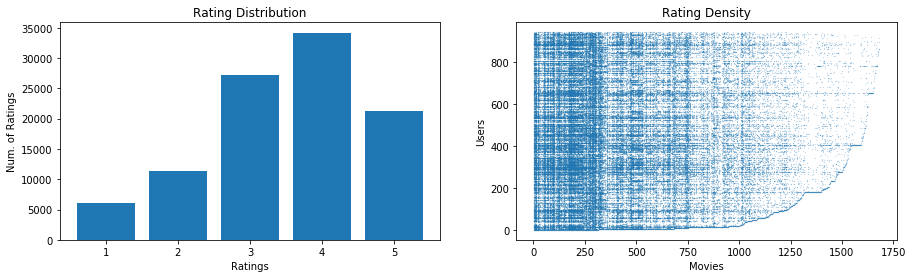

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
rating_count = rating_dataset[['movie_id','rating']].groupby('rating').count()
plt.bar(rating_count.index, rating_count['movie_id'])
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Num. of Ratings')

plt.subplot(1,2,2)
plt.plot(rating_dataset['movie_id'],rating_dataset['user_id'],'o', markersize=0.1)
plt.title('Rating Density')
plt.xlabel('Movies')
plt.ylabel('Users')

We print the head of our second dataset to understand how the data is structured, and we also print the shape of the dataset to understand its dimensions. 

In [5]:
print(user_dataset.head())
print('\nDataset Shape: {}'.format(user_dataset.shape))

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Dataset Shape: (943, 5)


We plot a couple of graphs, related to our second dataset, so we can better visualize the data we are dealing with. In the first graph we can see the number of people by age and gender, from which we can notice that the most people that rated movies are males between 20 and 35 years of age; from the second graph, we can see the occupation distribution of the users, which are mostly students. 

Text(0, 0.5, 'Num. of People')

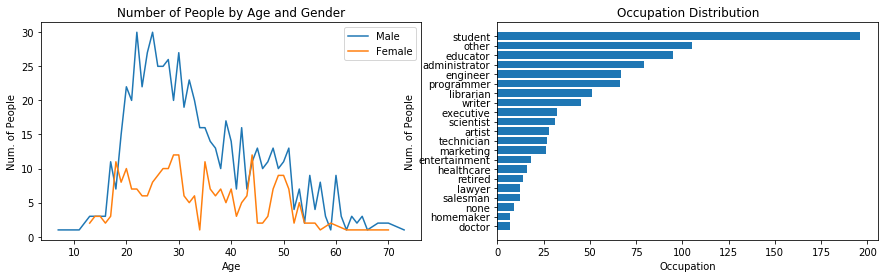

In [6]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
age_count_male = user_dataset[user_dataset['gender'] == 'M'].groupby(['age']).count()
age_count_female = user_dataset[user_dataset['gender'] == 'F'].groupby(['age']).count()
plt.plot(age_count_male['user_id'], label='Male')
plt.plot(age_count_female['user_id'], label='Female')
plt.xlabel('Age')
plt.ylabel('Num. of People')
plt.title('Number of People by Age and Gender')
plt.legend()

plt.subplot(1,2,2)
occupation_count = user_dataset.groupby(['occupation']).count().sort_values('user_id')
plt.barh(occupation_count.index, occupation_count['user_id'])
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Num. of People')

We print the head of our third dataset to understand how the data is structured, and we also print the shape of the dataset to understand its dimensions. 

In [7]:
print(movie_dataset.head())
print('\nDataset Shape: {}'.format(movie_dataset.shape))

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   


We plot a couple of graphs, related to our third dataset, so we can better visualize the data we are dealing with. In the first graph we can see the number of movies by genre, where the most common are drama and comedy. In the second graph we can see the number of movies by the year of release, for which we only took into account years that had over 10 movies; in this case, the year with the most movies is 1996.

Text(0.5, 1.0, 'Num. of Movies by Year With More Than 10 Movies')

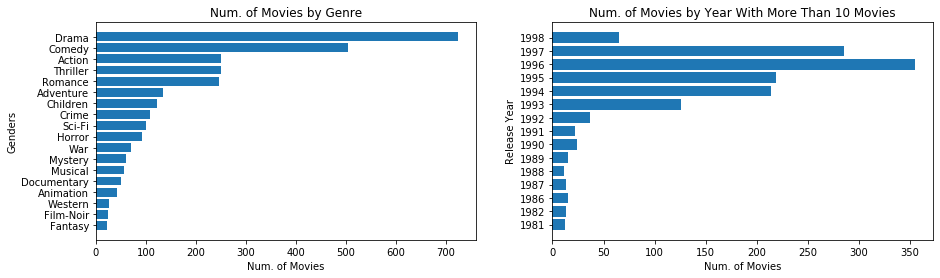

In [75]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
genre_columns = movie_dataset.columns[6:]
movie_genres_count = movie_dataset[genre_columns].sum().sort_values()
plt.barh(movie_genres_count.index,movie_genres_count)
plt.xlabel('Num. of Movies')
plt.ylabel('Genders')
plt.title('Num. of Movies by Genre')

plt.subplot(1,2,2)
movie_dataset['release_year'] = movie_dataset['release_date'].str[-4:]
release_year_count = movie_dataset[['movie_id','release_year']].groupby('release_year').count()
movies_over_ten = release_year_count['movie_id'][release_year_count['movie_id'] > 10]
plt.barh(movies_over_ten.index, movies_over_ten)
plt.xlabel('Num. of Movies')
plt.ylabel('Release Year')
plt.title('Num. of Movies by Year With More Than 10 Movies')

### Exercise 2: Implement basic matrix factorization (MF) technique for recommender systems (8 Points)

We create a matrix with the ratings by having the rows for each movie and columns for each user, and then we print the head of the dataset to see how the transformation was done.

In [9]:
rating_matrix = rating_dataset.pivot(index='movie_id', columns='user_id', values='rating')

print(rating_matrix.head())

user_id   1    2    3    4    5    6    7    8    9    10   ...  934  935  \
movie_id                                                    ...             
1         5.0  4.0  NaN  NaN  4.0  4.0  NaN  NaN  NaN  4.0  ...  2.0  3.0   
2         3.0  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  ...  4.0  NaN   
3         4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4         3.0  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  4.0  ...  5.0  NaN   
5         3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

user_id   936  937  938  939  940  941  942  943  
movie_id                                          
1         4.0  NaN  4.0  NaN  NaN  5.0  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  
3         4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 943 columns]


We define the scaler and normalize our data between zero and one; then we print the head of the dataframe to see how our data was transformed.

In [10]:
scaler = MinMaxScaler()
rating_matrix_scaled = pd.DataFrame(scaler.fit_transform(rating_matrix))

print(rating_matrix_scaled.head())

    0     1    2    3     4     5    6    7    8    9    ...   933  934   935  \
0  1.00  0.75  NaN  NaN  0.75  0.75  NaN  NaN  NaN  0.5  ...  0.25  0.5  0.75   
1  0.50   NaN  NaN  NaN  0.50   NaN  NaN  NaN  NaN  NaN  ...  0.75  NaN   NaN   
2  0.75   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN  0.75   
3  0.50   NaN  NaN  NaN   NaN   NaN  1.0  NaN  NaN  0.5  ...  1.00  NaN   NaN   
4  0.50   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   NaN   

   936   937  938   939  940  941  942  
0  NaN  0.75  NaN   NaN  1.0  NaN  NaN  
1  NaN   NaN  NaN   NaN  NaN  NaN  1.0  
2  NaN   NaN  NaN   NaN  NaN  NaN  NaN  
3  NaN   NaN  NaN  0.25  NaN  NaN  NaN  
4  NaN   NaN  NaN   NaN  NaN  NaN  NaN  

[5 rows x 943 columns]


We define the train and test size, and then proceed to split the dataset into train and test. We had seen before that the first movies had more ratings, so we took that into account for the split, where we took the first movies as train and the last ones for test. We then print the head of the train set to get a better idea of the dataframe.

In [92]:
train_size = round(len(rating_matrix_scaled) * 0.8)
test_size = round(len(rating_matrix_scaled) * 0.2)

train_dataset = rating_matrix_scaled.iloc[:train_size,:]
test_dataset = rating_matrix_scaled.iloc[train_size:train_size+test_size,:]

train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.00,0.75,NaN,NaN,0.75,0.75,NaN,NaN,NaN,0.5,...,0.25,0.5,0.75,NaN,0.75,NaN,NaN,1.0,NaN,NaN
1,0.50,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,...,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.50,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.5,...,1.00,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN
4,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We define the loss function and its gradients in order to use them in our algorithm.

In [95]:
def loss_function(val_true,val_predicted,reg_constant,P,Q):
    return np.sum((val_true-val_predicted)**2 + reg_constant*(P**2 + Q**2))

def gradient_P(val_true,val_predicted,reg_constant,P,Q):
    return -2*(val_true-val_predicted)*Q + 2*reg_constant*P

def gradient_Q(val_true,val_predicted,reg_constant,P,Q):
    return -2*(val_true-val_predicted)*P + 2*reg_constant*Q

We create a function to learn the latent factors using Stochastic Gradient Descent. We also 

In [ ]:
def learn_latent_factors(train_dataset,reg_constant,alpha):
    P = np.ones((rows,latent_factors))
    Q = np.ones((latent_factors,columns))
    pred_matrix = np.dot(P,Q)
    rmse = np.sqrt(mean_squared_error(train_dataset,pred_matrix))
    while rmse > 0.05:
        for row in range(rows):
            for col in range(columns):
                for factor in range(num_dim):
                    P[row,factor] = P[row,factor] - alpha*(-2*(train_dataset[row,col]-
                                    pred_matrix[row,col]*Q[factor,col]+2*reg_constant*
                                    P[row,factor]))
                    Q[row,factor] = Q[row,factor] - alpha*(-2*(train_dataset[row,col]-
                                    pred_matrix[row,col]*P[row,factor]+2*reg_constant*
                                    Q[factor,col]))
        rmse = np.sqrt(mean_squared_error(train_dataset,pred_matrix))
    return P,Q

We get the number of rows and columns of our original matrix and define the number of latent dimensions we want to have. Then we create a non-negative mat|rix for 'P' and 'Q' with the required dimensions in order to have them for our algorithm.

In [ ]:
rows = train_dataset.shape[0]
columns = train_dataset.shape[1]
num_dim = 50

P,Q = learn_latent_factors(train_dataset_filled,0.5,0.1)

EXERCISE 2 NOT FINISHED

### Exercise 3: Recommender Systems using matrix factorization libmf / sckit-learn (8 Points)

We fill the 'NaN' with zeros, as Scikit's NMF library doesn't support 'NaN' values. Then we print the head of our dataframe to see how the data changed. 

In [13]:
rating_matrix_filled = rating_matrix.fillna(0)

print(rating_matrix_filled.head())

user_id   1    2    3    4    5    6    7    8    9    10   ...  934  935  \
movie_id                                                    ...             
1         5.0  4.0  0.0  0.0  4.0  4.0  0.0  0.0  0.0  4.0  ...  2.0  3.0   
2         3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0   
3         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  ...  5.0  0.0   
5         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

user_id   936  937  938  939  940  941  942  943  
movie_id                                          
1         4.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  
3         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 943 columns]


We now scale the data values between zero and one, and also print the head of the dataframe to see how the data changed.

In [14]:
rating_matrix_filled_scaled = pd.DataFrame(scaler.fit_transform(rating_matrix_filled))

print(rating_matrix_filled_scaled.head())

   0    1    2    3    4    5    6    7    8    9    ...  933  934  935  936  \
0  1.0  0.8  0.0  0.0  0.8  0.8  0.0  0.0  0.0  0.8  ...  0.4  0.6  0.8  0.0   
1  0.6  0.0  0.0  0.0  0.6  0.0  0.0  0.0  0.0  0.0  ...  0.8  0.0  0.0  0.0   
2  0.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.8  0.0   
3  0.6  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.8  ...  1.0  0.0  0.0  0.0   
4  0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   937  938  939  940  941  942  
0  0.8  0.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.4  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 943 columns]


We define the train and test size, and then proceed to split the dataset into train and test. We had seen before that the first movies had more ratings, so we took that into account for the split, where we took the first movies as train and the last ones for test. We then print the head of the train set to get a better idea of the dataframe.

In [17]:
train_size = round(len(rating_matrix_filled_scaled) * 0.8)
test_size = round(len(rating_matrix_filled_scaled) * 0.2)

train_dataset_filled = rating_matrix_filled_scaled.iloc[:train_size,:]
test_dataset_filled = rating_matrix_filled_scaled.iloc[train_size:train_size+test_size,:]

train_dataset_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.0,0.8,0.0,0.0,0.8,0.8,0.0,0.0,0.0,0.8,...,0.4,0.6,0.8,0.0,0.8,0.0,0.0,1.0,0.0,0.0
1,0.6,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0
4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We create a function that takes a dataset and splits it into k-folds, where it creates a list of the folds. We then proceed to call the function to split our train dataset into three folds.

In [63]:
def create_folds_list(dataset,k):
    fold_size = int(np.floor(len(dataset)/k))
    start = 0
    end = fold_size
    folds = []

    for i in range(k):
        fold = dataset.iloc[start:end,:]
        folds.append(fold)
        start = end
        end = end + fold_size
    return folds

folds = create_folds_list(train_dataset_filled,3)

We create a function that splits our folds list into train and test fold, where the index given in the parameters is taken as test and the others are concatenated for train. 

In [61]:
def get_train_test_fold(folds_list,test_index):
    test_fold = folds_list[test_index]
    train_fold = pd.DataFrame()
    for k in range(len(folds_list)):
        if k != test_index:
            train_fold = train_fold.append(folds_list[k])
    return (test_fold,train_fold)

Here we run the cross-validation using different latent dimensions, starting from 50 to 800. We then train and test each latent dimension using our k-folds we created previously. We print the latent dimensions used and the RMSE, so we can understand how many latent dimensions perform better.

In [88]:
latent_dimensions = [60, 120, 180, 240, 300]
rmse_arr = []

for dimension in latent_dimensions:
    nmf_model = NMF(n_components=dimension, solver='cd', init='nndsvd')
    rmse_errors = []
    for i in range(len(folds)):
        test_fold,train_fold = get_train_test_fold(folds,i)
        nmf_model.fit(train_fold)
        P = nmf_model.transform(test_fold)
        Q = nmf_model.components_
        predicted_matrix = np.dot(P,Q)
        rmse = np.sqrt(mean_squared_error(test_fold,predicted_matrix))
        rmse_errors.append(rmse)
    mean_rmse = np.mean(rmse_errors)
    rmse_arr.append(mean_rmse)
    print('Latent Dimensions: {}, Avg. RMSE: {}'.format(dimension,mean_rmse))

Latent Dimensions: 60, Avg. RMSE: 0.14544754659399683
Latent Dimensions: 120, Avg. RMSE: 0.14096621133153867
Latent Dimensions: 180, Avg. RMSE: 0.13701139982783406
Latent Dimensions: 240, Avg. RMSE: 0.13398154512420804
Latent Dimensions: 300, Avg. RMSE: 0.12994367387440658


We can see that the higher the number of the latent dimensions, the better that our model performs; however, the higher the number of latent dimensions, the longer it takes to train our model. 

Text(0.5, 1.0, 'RMSE by Num. of Dimensions')

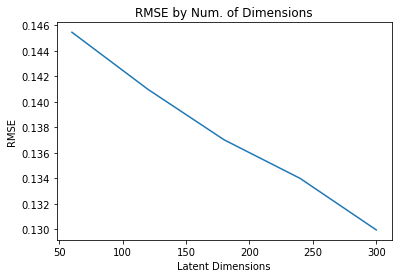

In [90]:
plt.plot(latent_dimensions,rmse_arr)
plt.xlabel('Latent Dimensions')
plt.ylabel('RMSE')
plt.title('RMSE by Num. of Dimensions')

Now that we know how many latent dimensions perform better, we run our whole model using these. We can see that our model performed really well by achieving a very low RMSE. 

In [91]:
nmf_model = NMF(n_components=300, solver='cd', init='nndsvd')

nmf_model.fit(train_dataset_filled)
P = nmf_model.transform(test_dataset_filled)
Q = nmf_model.components_
predicted_matrix = np.dot(P,Q)
rmse = np.sqrt(mean_squared_error(test_dataset_filled,predicted_matrix))
print('Test RMSE: {}'.format(round(rmse,2)))

Test RMSE: 0.03
